In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

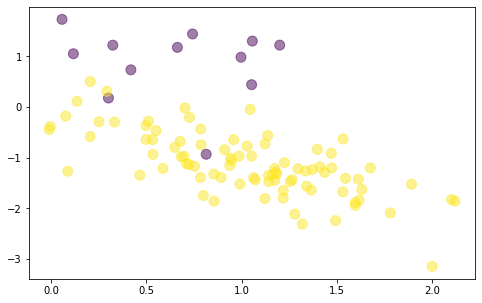

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                           n_classes=2, n_clusters_per_class=1, weights=[0.1, 0.9], random_state=76)

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, alpha=0.5)
plt.show()

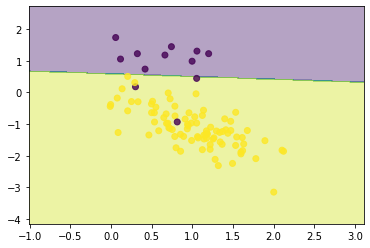

In [3]:
clf = LogisticRegression()
clf.fit(X, y)


plot_step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

In [4]:
def plot_samples(X, y, ax, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
    if title is not None:
        ax.set_title(title)
    sns.despine(ax=ax, offset=10)

In [5]:
def plot_decision_function(X, y, clf, ax, title=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    
    if title is not None:
        ax.set_title(title)

## Over-sampling

`Random Over-sampling` : 소수 클래스의 원 데이터를 중복 생성

`SMOTE` : Interpolation을 통해 새로운 데이터를 생성 (아래 이미지 참고)

`ADASYN` : `SMOTE`와 같이 interpolation을 통해 생성하나, 원 데이터 중 K-NN으로 잘못 분류되는 데이터들을 중점으로 생성

![SMOTE](https://imbalanced-learn.org/stable/_images/sphx_glr_plot_illustration_generation_sample_001.png)

> 출처 : https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_illustration_generation_sample.html

In [6]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

### Random Oversampling VS. SMOTE VS. ADASYN

In [7]:
X_samples = {'Raw': X}
y_samples = {'Raw': y}

samplers = {'Random': RandomOverSampler(), 
            'SMOTE': SMOTE(),
            'ADASYN': ADASYN()}

for name, sampler in samplers.items():
    X_samples[name], y_samples[name] = sampler.fit_resample(X, y)

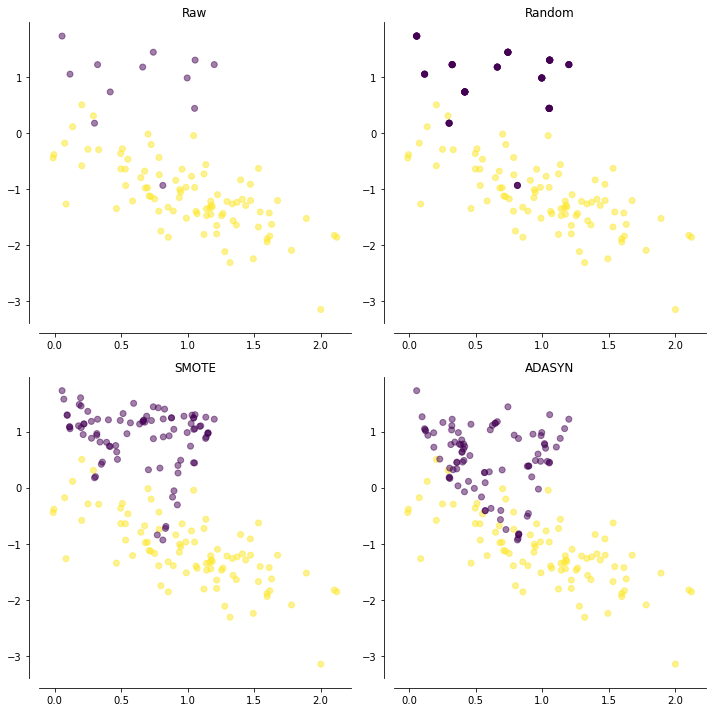

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for ax, key in zip(axes.ravel(), X_samples.keys()):
    plot_samples(X_samples[key], y_samples[key], ax, title=key)
fig.tight_layout()

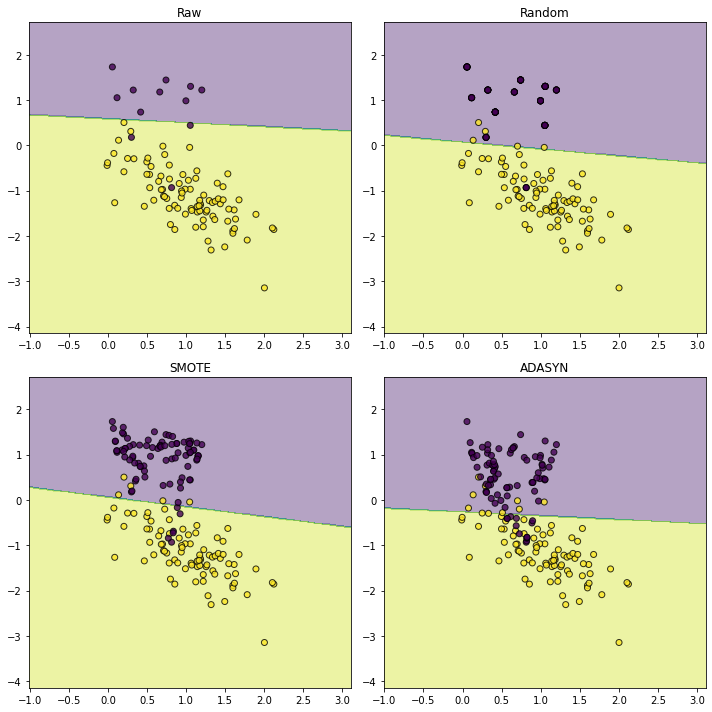

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

clf = LogisticRegression()

for ax, key in zip(axes.ravel(), X_samples.keys()):
    clf.fit(X_samples[key], y_samples[key])
    plot_decision_function(X_samples[key], y_samples[key], clf, ax, title=key)
fig.tight_layout()

## Under-sampling

In [10]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours

### Random Under-sampling VS. Tomek Links VS. ENN

> 하이브리드에서 Tomek Links와 ENN을 사용하기 때문에 비교 대상으로 삼았다.

In [11]:
X_samples = {'Raw': X}
y_samples = {'Raw': y}

samplers = {'Random': RandomUnderSampler(), 
            'Tomek': TomekLinks(),
            'ENN': EditedNearestNeighbours()}

for name, sampler in samplers.items():
    X_samples[name], y_samples[name] = sampler.fit_resample(X, y)

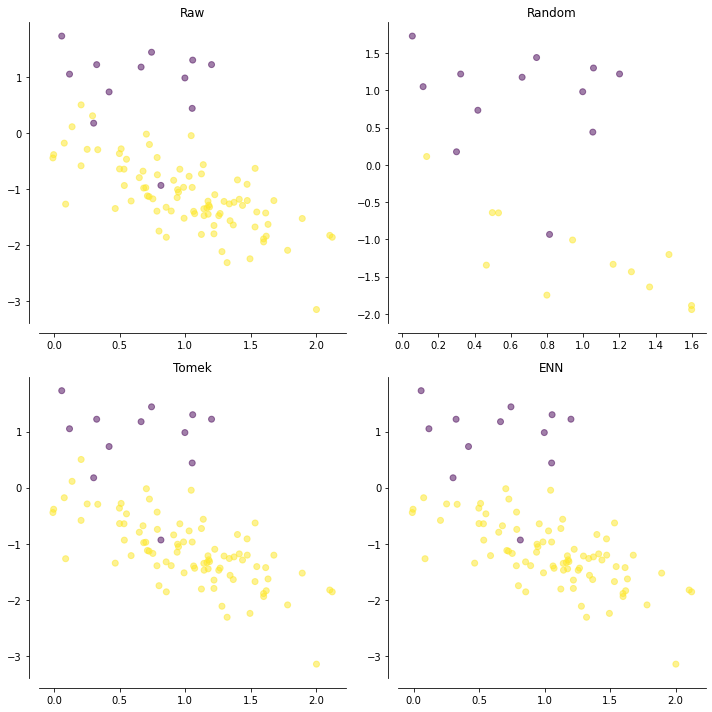

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for ax, key in zip(axes.ravel(), X_samples.keys()):
    plot_samples(X_samples[key], y_samples[key], ax, title=key)
fig.tight_layout()

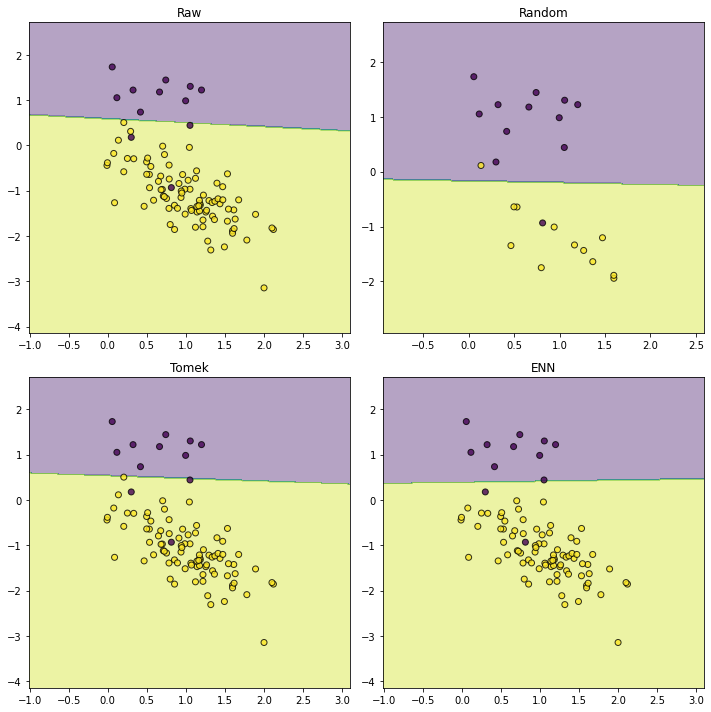

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

clf = LogisticRegression()

for ax, key in zip(axes.ravel(), X_samples.keys()):
    clf.fit(X_samples[key], y_samples[key])
    plot_decision_function(X_samples[key], y_samples[key], clf, ax, title=key)
fig.tight_layout()

### Tomek Link

Tomek link는 서로 가장 가까운 이웃이면서 클래스가 다른 데이터 쌍을 의미한다. 이러한 Tomek link를 제거하는 방식이다. 

![Tomek Link](https://imbalanced-learn.org/stable/_images/sphx_glr_plot_illustration_tomek_links_001.png)

이 때, `sampling_strategy='auto'`로 설정하면 다수 클래스에 속하는 데이터만 제거하고, `sampling_strategy='all'`로 설정하면 둘 다 제거한다.

> Hybrid 모델에서 'all' 사용

![Comparison between 'auto' and 'all'](https://imbalanced-learn.org/stable/_images/sphx_glr_plot_illustration_tomek_links_002.png)


> 출처 : https://imbalanced-learn.org/stable/auto_examples/under-sampling/plot_illustration_tomek_links.html

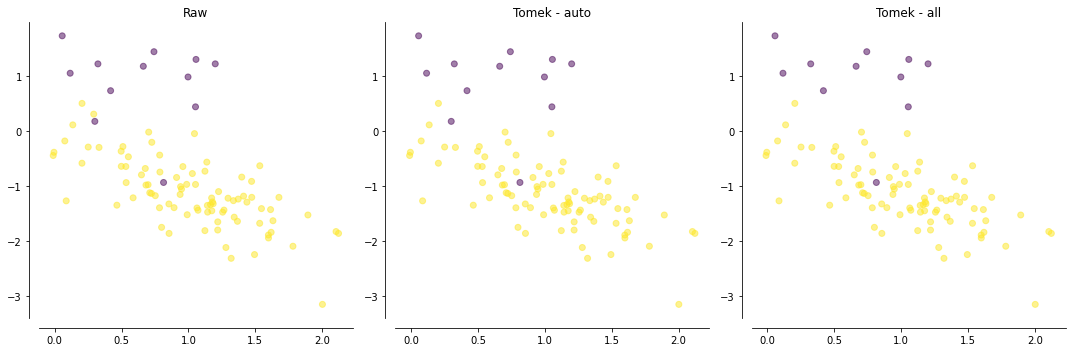

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

X_samples = {'Raw': X}
y_samples = {'Raw': y}

samplers = {'Tomek - auto': TomekLinks(),
            'Tomek - all': TomekLinks(sampling_strategy='all')}

for name, sampler in samplers.items():
    X_samples[name], y_samples[name] = sampler.fit_resample(X, y)

for ax, key in zip(axes.ravel(), X_samples.keys()):
    plot_samples(X_samples[key], y_samples[key], ax, title=key)
fig.tight_layout()

### ENN

Nearest-neighbors 알고리즘을 적용하고 기준(이웃들이 충분히 같은 클래스인지)을 충족하지 않는 데이터 제거

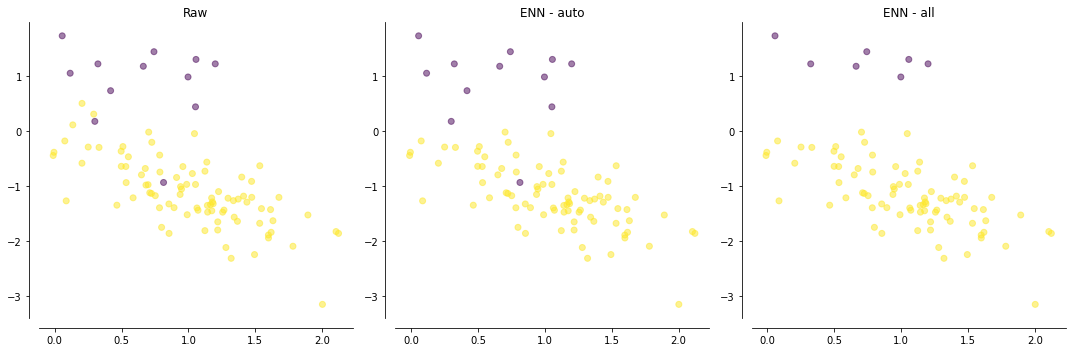

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

X_samples = {'Raw': X}
y_samples = {'Raw': y}

samplers = {'ENN - auto': EditedNearestNeighbours(),
            'ENN - all': EditedNearestNeighbours(sampling_strategy='all')}

for name, sampler in samplers.items():
    X_samples[name], y_samples[name] = sampler.fit_resample(X, y)

for ax, key in zip(axes.ravel(), X_samples.keys()):
    plot_samples(X_samples[key], y_samples[key], ax, title=key)
fig.tight_layout()

## Hybrid Sampling

> `SMOTE`를 통해 생성된 잡음이 낀 샘플을 undersampling을 거쳐 잡음을 제거

| Method | Description |
|:----------:|:----------------------------------------------------------|
| SMOTEENN   | Over-sampling using SMOTE and cleaning using ENN.         |
| SMOTETomek | Over-sampling using SMOTE and cleaning using Tomek links. |

In [16]:
from imblearn.combine import SMOTEENN, SMOTETomek

In [17]:
RANDOM_STATE = 0

X_samples = {'Raw': X}
y_samples = {'Raw': y}

X_samples['SMOTE'], y_samples['SMOTE'] = SMOTE(random_state=RANDOM_STATE).fit_resample(X, y)
X_samples['SMOTE + Tomek'], y_samples['SMOTE + Tomek'] = SMOTETomek(random_state=RANDOM_STATE).fit_resample(X, y)
X_samples['SMOTE + ENN'], y_samples['SMOTE + ENN'] = SMOTEENN(random_state=RANDOM_STATE).fit_resample(X, y)

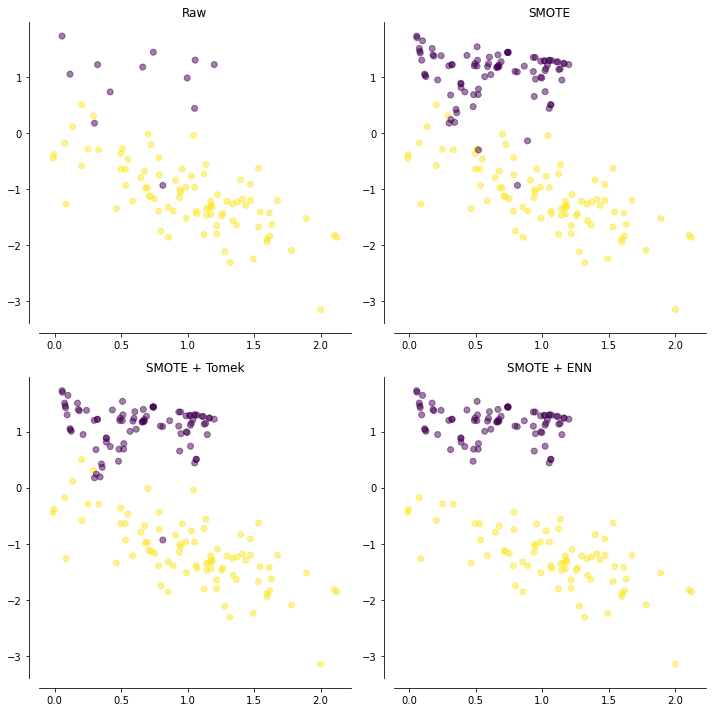

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for ax, key in zip(axes.ravel(), X_samples.keys()):
    plot_samples(X_samples[key], y_samples[key], ax, title=key)
fig.tight_layout()

### Random Over-sampling

- `shrinkage` : Parameter controlling the shrinkage applied to the covariance matrix.

> smoothed bootstrap 생성을 위해 사용

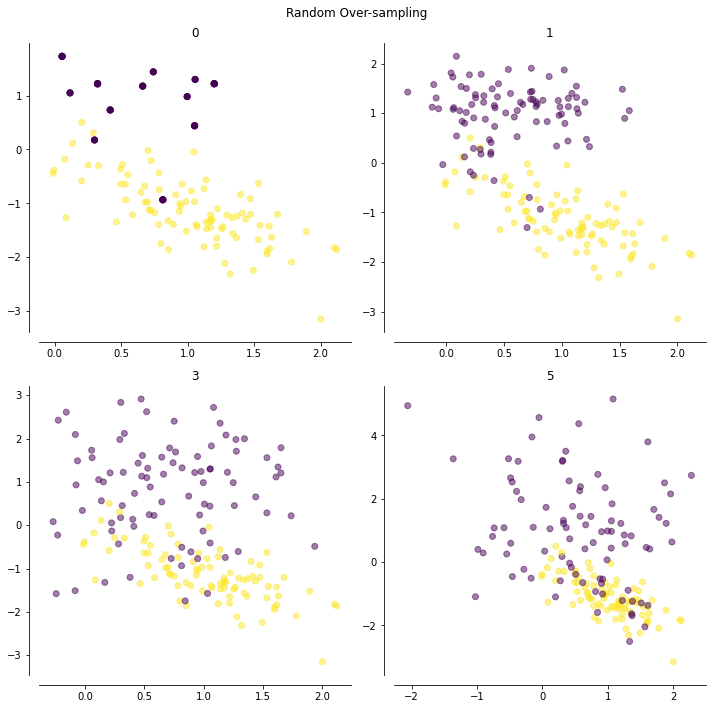

In [19]:
shrinkages = [0, 1, 3, 5]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for ax, shrinkage in zip(axes.ravel(), shrinkages):
    sampler = RandomOverSampler(shrinkage=shrinkage)
    X_sample, y_sample = sampler.fit_resample(X, y)
    plot_samples(X_sample, y_sample, ax, title=shrinkage)

fig.suptitle('Random Over-sampling')
fig.tight_layout()

### SMOTE 적용 후 Tomek Link 또는 ENN을 적용한 결과와 비교

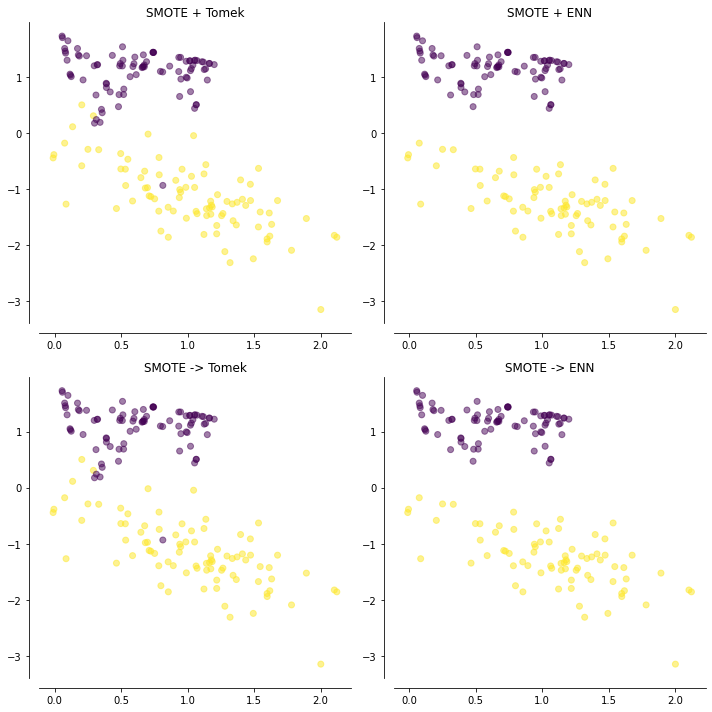

In [20]:
RANDOM_STATE = 0

X_samples = {}
y_samples = {}

X_samples['SMOTE + Tomek'], y_samples['SMOTE + Tomek'] = SMOTETomek(random_state=RANDOM_STATE).fit_resample(X, y)
X_samples['SMOTE + ENN'], y_samples['SMOTE + ENN'] = SMOTEENN(random_state=RANDOM_STATE).fit_resample(X, y)

X_sample, y_sample = SMOTE(random_state=RANDOM_STATE).fit_resample(X, y)
X_samples['SMOTE -> Tomek'], y_samples['SMOTE -> Tomek'] = TomekLinks(sampling_strategy='all').fit_resample(X_sample, y_sample)
X_samples['SMOTE -> ENN'], y_samples['SMOTE -> ENN'] = EditedNearestNeighbours(sampling_strategy='all').fit_resample(X_sample, y_sample)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for ax, key in zip(axes.ravel(), X_samples.keys()):
    plot_samples(X_samples[key], y_samples[key], ax, title=key)
fig.tight_layout()

> 결과가 같은 것을 확인할 수 있다.